In [1]:
import numpy as np
import torch.nn as nn
import numpy as np
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
import gc
import os 
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import os
# from transformers import AutoTokenizer
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from datasets import Dataset
import torchaudio
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import youtokentome as yttm

In [2]:
# input_folder_path = "/storage/student5/xuan_quy/asrdata/txt"

# # Define a temporary file to combine the inputs
# combined_text_path = "combined_vietnamese_text.txt"

# # Define the path to save your trained BPE model
# bpe_model_path = "vietnamese_bpe.model"

# vocab_size = 8000 


In [3]:

# import os
# from pathlib import Path

# # Path to the folder containing your Vietnamese text files
# input_folder_path = "/storage/student5/xuan_quy/asrdata/txt"

# # Define a temporary file to combine the inputs
# combined_text_path = "combined_vietnamese_text.txt"

# # Define the path to save your trained BPE model
# bpe_model_path = "vietnamese_bpe.model"

# # Set the desired vocabulary size
# vocab_size = 8000  # Adjust this based on your requirements

# # Combine all text files in the folder into one temporary file
# with open(combined_text_path, "w") as outfile:
#     for file_path in Path(input_folder_path).glob("*.txt"):
#         with open(file_path, "r") as infile:
#             outfile.write(infile.read() + "\n")

# # Train the BPE model using the combined file
# yttm.BPE.train(data=combined_text_path, vocab_size=vocab_size, model=bpe_model_path)

# # Optionally remove the temporary combined file
# os.remove(combined_text_path)

# print(f"BPE model trained and saved at: {bpe_model_path}")


In [4]:
# # Load the trained BPE model


# # Example Vietnamese sentence
# sentence = "Tôi muốn học máy học và trí tuệ nhân tạo."

# # Encode the sentence to BPE tokens
# encoded = bpe.encode(sentence, output_type=yttm.OutputType.ID)
# print("Encoded IDs:", encoded)

# # Encode the sentence to BPE subword tokens
# subwords = bpe.encode(sentence, output_type=yttm.OutputType.SUBWORD)
# print("Encoded Subwords:", subwords)

# # Decode the encoded IDs back to the original sentence
# decoded = bpe.decode(encoded)
# print("Decoded Sentence:", decoded[0])


In [5]:
# from torch.nn.utils.rnn import pad_sequence
# from pathlib import Path
# import torch
# from tqdm import tqdm

# def encode_text_file(file_path, bpe):
#     with open(file_path, "r") as f:
#         text = f.read().strip()
#     # Encode the text to a list of subword IDs
#     token_ids = bpe.encode(text, output_type=yttm.OutputType.ID)
#     return torch.tensor(token_ids, dtype=torch.long)
 
 
# bpe = yttm.BPE(model=bpe_model_path)
# # Collect and encode all files
# encoded_texts = []
# for i in range(len(os.listdir(input_folder_path))):
#     encoded_texts.append(encode_text_file(f'{input_folder_path}/{i}.txt', bpe))
#     print(f"Encoded {i}.txt")

# # Pad encoded texts to the length of the longest sequence
# padded_encoded_texts = pad_sequence(encoded_texts, batch_first=True, padding_value= vocab_size+1)
# torch.save(padded_encoded_texts, "padded_encoded_texts.pt")
# print("Padded Encoded Texts:")
# print(padded_encoded_texts)
# print("Shape:", padded_encoded_texts.shape)

In [6]:
# audio_file_path = "/storage/student5/xuan_quy/asrdata/wav/"
# from pathlib import Path

# train = []
# def extract_audio_features(file_path):
#     # Load the audio file
#     waveform, sample_rate = torchaudio.load(file_path)
#     spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft= 1024,n_mels=64)(waveform)
#     return spectrogram.squeeze(0).transpose(0, 1)

# # audio = extract_audio_features(audio_file_path)
# # print(audio.shape)
# for i in range(len(os.listdir(audio_file_path))):
    
#     audio = extract_audio_features(f'{audio_file_path}/{i}.wav')
#     print(f"Processed audio file: {i}.wav")
#     print("Shape:", audio.shape)
#     print("")
#     train.append(audio)

# # Pad the audio features to the length of the longest sequence
# padded_audio = pad_sequence(train, batch_first=True, padding_value=0)

# print("Padded Audio Features:")
# print(padded_audio)
# print("Shape:", padded_audio.shape)
# torch.save(padded_audio, "padded_audio.pt")



In [7]:
# waveform, sr = torchaudio.load("/storage/student5/xuan_quy/asrdata/wav/1991.wav")
# print(waveform.shape)
# melspec = torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft= 1024,n_mels=64)(waveform)
# print(melspec.shape)
# print(melspec.squeeze(0).transpose(0, 1).shape)

In [8]:

# model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")
# processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")

# wav_folder = '/storage/student5/xuan_quy/asrdata/wav'
# txt_folder = "/storage/student5/xuan_quy/asrdata/txt"

# tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")


# # Prepare list to store audio data and tokenized transcriptions
# data = {"audio": [], "text": [], "input_ids": [], "attention_mask": []}

# # Loop through all .wav and .txt files in the folders
# for filename in os.listdir(wav_folder):
#     if filename.endswith(".wav"):
#         file_path = os.path.join(wav_folder, filename)
#         print(f"Processing audio file {file_path}")
#         # Load audio file
#         waveform, sample_rate = torchaudio.load(file_path)

#         # Resample if not at 16 kHz (Wav2Vec2 expects 16kHz audio)
#         if sample_rate != 16000:
#             resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
#             waveform = resampler(waveform)
#         #add padding
#         max_len = 16000
#         waveform = F.pad(waveform, (0, max_len - waveform.shape[1]), "constant", 0)
#         # Convert waveform to a 1D tensor
#         waveform = waveform.squeeze(0)
#         print(waveform.shape)
#         # Add waveform data to dataset
#         data["audio"].append({"array": waveform.numpy(), "sampling_rate": 16000})

#         # Match .txt transcription file by name
#         txt_filename = os.path.splitext(filename)[0] + ".txt"
#         txt_path = os.path.join(txt_folder, txt_filename)
#         if os.path.isfile(txt_path):
#             print(f"Processing transcription file {txt_path}")
#             with open(txt_path, "r", encoding="utf-8") as f:
#                 transcription = f.read().strip()
#                 data["text"].append(transcription)
                
#                 # Tokenize the transcription text with padding and truncation
#                 max_word_len = 357
#                 tokens = tokenizer(transcription, return_tensors="pt" ,padding = 'max_length', max_length = max_word_len, truncation=True)
#                 data["input_ids"].append(tokens.input_ids[0].numpy())  # Convert to numpy array for compatibility
#                 data["attention_mask"].append(tokens.attention_mask[0].numpy())  # Store attention mask for padding
#         else:
#             print(f"Warning: No matching transcription found for {filename}")
#             data["text"].append("")

# # Convert data into Hugging Face Dataset object
# dataset = Dataset.from_dict(data)

# # Preprocess the audio data

# # Apply preprocessing to audio data

# # Now, `dataset` contains padded audio, transcriptions, and tokenized text ready for fine-tuning
# print(dataset)


In [9]:
# dataset.save_to_disk("/storage/student5/xuan_quy/asrdata/dataset")
# print(dataset['input_ids'][0])
# print(dataset['attention_mask'][0])
# print(dataset['text'][0])
# # print(dataset['audio'][0])
# print(dataset['audio'][0]['array'])
# print(dataset['audio'][0]['sampling_rate'])
# from datasets import load_from_disk

# dataset = load_from_disk("/storage/student5/xuan_quy/asrdata/dataset")



In [10]:
# model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")
# processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
# max_word_len = 357
# def preprocess_function(examples):
#     inputs = processor(
#         examples["audio"]["array"],
#         sampling_rate=examples["audio"]["sampling_rate"],
#         return_tensors="pt",
#         padding=True
#     )
#     input_values = inputs.input_values.squeeze()
    
#     with processor.as_target_processor():
#         labels = processor.tokenizer(examples["text"],return_tensors="pt" ,padding = 'max_length', max_length = max_word_len, truncation=True).input_ids
    
#     return {"input_values": input_values, "labels": labels}

# dataset = dataset.map(preprocess_function)
# # split dataset into train, validation and test set 
# train_dataset = dataset.train_test_split(test_size=0.1, shuffle=True)
# train_dat= train_dataset['train']
# val_dat = train_dataset['test']
# print(train_dat)
# print(val_dat)

In [11]:

# #save dataset 
# train_dat.save_to_disk('/storage/student5/xuan_quy/asrdata/train')
# val_dat.save_to_disk('/storage/student5/xuan_quy/asrdata/val')


In [12]:
# from transformers import TrainingArguments
# os.environ["CUDA_VISIBLE_DEVICES"] = "3" 
# # Define training arguments
# training_args = TrainingArguments(
#     output_dir="./wav2vec2_finetune",       # Directory to save checkpoints
#     per_device_train_batch_size=8,          # Adjust based on available GPU memory
#     per_device_eval_batch_size=8,           # Same as train batch size for simplicity
#     evaluation_strategy="no",            # Evaluate at certain steps
#     logging_steps=50,                       # Log every 50 steps
#     save_steps=400,                         # Save every 400 steps
#     eval_steps=400,                         # Evaluate every 400 steps
#     learning_rate=3e-4,                     # Adjust as needed for your data
#     num_train_epochs=10,                    # Set based on dataset size
#     warmup_steps=500,                       # Warmup to prevent sudden gradient changes
#     save_total_limit=2,                     # Keep only the 2 latest checkpoints
#     fp16=True,                              # Use mixed precision for faster training if supported
#     gradient_accumulation_steps=2,        
#       # Adjust if using small batches
# )

# # class DataCollatorCTCWithPadding:
# #     def __init__(self, processor, padding="longest"):
# #         self.processor = processor
# #         self.padding = padding

# #     def __call__(self, features):
# #         # Separate audio and label features
# #         audio_features = [feature["input_values"] for feature in features]
# #         label_features = [feature["labels"] for feature in features if "labels" in feature]

# #         # Pad input values dynamically to the longest sequence in the batch
# #         batch = self.processor(
# #             audio_features, 
# #             padding=self.padding,  # Dynamic padding per batch
# #             return_tensors="pt"
# #         )

# #         # Pad labels dynamically if available
# #         if label_features:
# #             labels = torch.nn.utils.rnn.pad_sequence(
# #                 [torch.tensor(label, dtype=torch.long) for label in label_features],
# #                 batch_first=True,
# #                 padding_value=self.processor.tokenizer.pad_token_id
# #             )
# #             batch["labels"] = labels

# #         return batch

# # # from transformers import DataCollatorCTCWithPadding



# # # Then initialize it like this:
# # data_collator = DataCollatorCTCWithPadding(processor=processor, padding="longest")


# #Define evaluation metric
# import evaluate

# # Load the Word Error Rate (WER) metric
# wer_metric = evaluate.load("wer")

# # Define compute_metrics function
# def compute_metrics(pred):
#     pred_logits = pred.predictions
#     pred_ids = np.argmax(pred_logits, axis=-1)

#     pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

#     pred_str = processor.batch_decode(pred_ids)
#     # we do not want to group tokens when computing the metrics
#     label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

#     wer = wer_metric.compute(predictions=pred_str, references=label_str)

#     return {"wer": wer}


# # Initialize Trainer
# from transformers import Trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dat,
#     tokenizer=processor.feature_extractor,
#     compute_metrics=compute_metrics
# )

# # Train the model
# trainer.train()

# # Save the model
# model.save_pretrained("./wav2vec2_finetuned")
# processor.save_pretrained("./wav2vec2_finetuned")


In [13]:
# mfccs = []
# audio_dir = "/storage/student5/xuan_quy/asrdata/wav/"
# max_len= 2521
# n_mfcc =20
# sample_rate = 16000
# print("Starting")
# for i in range(50000, len(os.listdir(audio_dir))):
# # for i in range(10):
#     y, sr = librosa.load(os.path.join(audio_dir, f"{i}.wav"), sr=sample_rate)
    
#     # Compute the MFCC features
#     mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
#     # Transpose the MFCC to match the model's expected input shape
#     mfcc = mfcc.T  # Shape becomes (time_steps, n_mfcc)
    
#     # Padding/truncating to `max_len`
#     if mfcc.shape[0] < max_len:
#         # Pad with zeros if shorter
#         pad_width = max_len - mfcc.shape[0]
#         mfcc = np.pad(mfcc, ((0, pad_width), (0, 0)), mode='constant')
#     else:
#         # Truncate if longer
#         mfcc = mfcc[:max_len, :]
#     # audio, sr = librosa.load(os.path.join(audio_dir, f"{i}.wav"), sr=16000)
#     # # audio = np.vstack([audio, audio])
#     # mfcc = librosa.feature.mfcc(y=audio, sr=sr)
#     # if mfcc.shape[1] < max_len:
#     #     # Pad with zeros if shorter
#     #     pad_width = max_len - mfcc.shape[1]
#     #     mfcc = np.pad(mfcc, (0, pad_width), mode='constant')
#     # else:
#     #     # Truncate if longer
#     #     mfcc = mfcc[:max_len, :]
#     print(f"Converted {i} audio")
#     mfccs.append(mfcc)
#     del(mfcc)
#     gc.collect()
# print("Saving npy")
# np.save('x5.npy', mfccs)
# print("Done :>")

In [14]:
# #get subword in txt folder:
# import os
# import re
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torch.utils.data import DataLoader

# # Define the path to the text files
# txt_folder = "/storage/student5/xuan_quy/asrdata/txt"

# # Initialize an empty set to store unique subwords
# subwords = set()

# # Loop through all .txt files in the folder
# for filename in os.listdir(txt_folder):
#     if filename.endswith(".txt"):
#         with open(os.path.join(txt_folder, filename), "r", encoding="utf-8") as f:
#             # Read the text file and convert to lowercase
#             text = f.read().lower()
#             # Tokenize the text into subwords
#             words = re.findall(r"\b\w+\b", text)
#             subwords.update(words)

# # Convert the set of subwords to a list
# subwords = list(subwords)
# print(f"Number of unique subwords: {len(subwords)}")

In [15]:
# tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
# # Tokenize the subwords
# with open ('/storage/student5/xuan_quy/asrdata/txt/0.txt', 'r', encoding='utf-8') as f:
#     text = f.read().lower()
#     print(f"text: {text}")
#     # words = re.findall(r"\b\w+\b", text)
#     # print(f"word: {words}")
#     # subwords = " ".join(words)
#     # print(f"subwords: {subwords}")
#     encoded_inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
#     print(encoded_inputs)
#     print(encoded_inputs.input_ids.shape)



In [16]:
# !mkdir /storage/student5/xuan_quy/asrdata/tokens

In [17]:
# from transformers import AutoTokenizer
# import re 
# import os
# import gc
# # Initialize the tokenizer (for subword tokenization)
# tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")  # Replace with chosen tokenizer model

# # Directory containing the text files
# transcript_dir = "/storage/student5/xuan_quy/asrdata/txt"

# # Use a set to store unique tokens
# unique_tokens = set()
# labels = []
# print(len(os.listdir(transcript_dir)))
# for i in range(len(os.listdir(transcript_dir))):
# # # Loop through each file in the directory
# # for filename in os.listdir(transcript_dir):
# #     if filename.endswith(".txt"):
#     with open(os.path.join(transcript_dir, f"{i}.txt"), 'r') as file:
#         text = file.read().lower()
        
#         max_length = 357# or 512 depending on your specific model configuration
#         # Tokenize the text
#         token = tokenizer(text, return_tensors="pt", padding='max_length', max_length=max_length, truncation=True)
#         print(token['input_ids'].shape)
#         labels.append(token['input_ids'].squeeze().numpy())
#         print(f"Processed file {i}.txt")


# # Save the labels to a numpy file
#         # labels.append(tokens)
# # The total number of unique IDs
# np.save('y.npy', np.array(labels))
# # print(labels)

In [18]:
# # x =torch.load('padded_audio.pt')
# y = torch.load('padded_encoded_texts.pt')
# # print(x[0])
# print(y[0])
# print(x.shape, y.shape)

In [19]:
# # x_train = x[:int(x.shape[0]*0.7),: , :]
# y_train = y[:int(y.shape[0]*0.7), :]

# # x_val = x[:int(x.shape[0]*0.2),: ,: ]
# y_val = y[:int(y.shape[0]*0.2) ,: ]

# # x_test = x[:int(x.shape[0]*0.1), :, :]
# y_test = y[:int(y.shape[0]*0.1), :]

In [20]:
# # print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

# # np.save('x_train.npy', x_train)
# np.save('y_train.npy', y_train)

# # np.save('x_val.npy', x_val)
# np.save('y_val.npy', y_val)

# # np.save('x_test.npy', x_test)
# np.save('y_test.npy', y_test)


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchaudio.transforms import MFCC
import numpy as np

# QuartzNet Block Definition
class QuartzNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, repeat=10, dropout=0.2):
        super(QuartzNetBlock, self).__init__()
        self.layers = nn.Sequential(*[
            nn.Sequential(
                nn.Conv1d(in_channels if i == 0 else out_channels, out_channels, kernel_size, padding=kernel_size // 2),
                nn.BatchNorm1d(out_channels),
                nn.ReLU(),
                nn.Dropout(dropout)
            )
            for i in range(repeat)
        ])
        self.residual = nn.Conv1d(in_channels, out_channels, 1)  # Residual connection

    def forward(self, x):
        return self.layers(x) + self.residual(x)

# QuartzNet Model Definition
class QuartzNet(nn.Module):
    def __init__(self, num_features, num_classes, dropout=0.2):
        super(QuartzNet, self).__init__()
        self.encoder = nn.Sequential(
            QuartzNetBlock(num_features, 64, kernel_size=33, dropout=dropout),
            QuartzNetBlock(64, 128, kernel_size=39, dropout=dropout),
            QuartzNetBlock(128, 256, kernel_size=41, dropout=dropout),
            QuartzNetBlock(256, 512, kernel_size=41, dropout=dropout),
            QuartzNetBlock(512, 512, kernel_size=41, dropout=dropout),
        )
        self.classifier = nn.Sequential(
            nn.Conv1d(512, num_classes, kernel_size=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        
        # x = x.permute(2, 0, 1)  # Prepare for CTC loss (T, N, C)
        return x    

# Custom Dataset for Speech Data
class SpeechDataset(Dataset):
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def __len__(self):
        return len(self.x_train)

    def __getitem__(self, idx):
        return self.x_train[idx], self.y_train[idx]

# Data Collator for Padding
def collate_fn(batch):
    x_batch, y_batch = zip(*batch)
    x_batch = [torch.tensor(x).permute(1,0) for x in x_batch]
    y_batch = [torch.tensor(y) for y in y_batch]

    # Pad MFCC features to the length of the longest sequence in the batch
    x_batch = nn.utils.rnn.pad_sequence(x_batch, batch_first=True)  # (N, C, T)

    # Calculate input lengths after padding
    input_lengths = torch.tensor([x.size(-1) for x in x_batch])  # Lengths of each input (time dimension)

    # Pad labels to the length of the longest sequence in the batch
    y_batch = nn.utils.rnn.pad_sequence(y_batch, batch_first=True, padding_value=-100)  # -100 is ignored by CTC loss
    target_lengths = torch.tensor([len(y) for y in y_batch])  # Lengths of each target

    return x_batch, y_batch, input_lengths, target_lengths



(39498, 2521, 64) (39498, 349)
Epoch 1, Loss: 1.0101019144058228
Validation Loss: 0.7999359704870678
Epoch 2, Loss: 0.5185635685920715
Validation Loss: 0.8297744600192007
Epoch 3, Loss: 0.687262237071991
Validation Loss: 0.6365209237036556
Epoch 4, Loss: 0.45351049304008484
Validation Loss: 0.6529383510351181
Epoch 5, Loss: 0.6791920065879822
Validation Loss: 0.6377184350497325
Epoch 6, Loss: 0.6872736811637878
Validation Loss: 0.6156616050950529
Epoch 7, Loss: 0.6830143332481384
Validation Loss: 0.7228416869306024
Epoch 8, Loss: 0.6053295135498047
Validation Loss: 0.6159043059639485
Epoch 9, Loss: 0.6306182146072388
Validation Loss: 0.6126926940240536
Epoch 10, Loss: 0.6308901906013489
Validation Loss: 0.6373259954513302
Epoch 11, Loss: 0.49910327792167664
Validation Loss: 0.5814371306987389
Epoch 12, Loss: 3.187992811203003
Validation Loss: 0.6833472720877645
Epoch 13, Loss: 0.5284697413444519
Validation Loss: 0.5652847995416976
Epoch 14, Loss: 0.4979622960090637
Validation Loss: 0.5

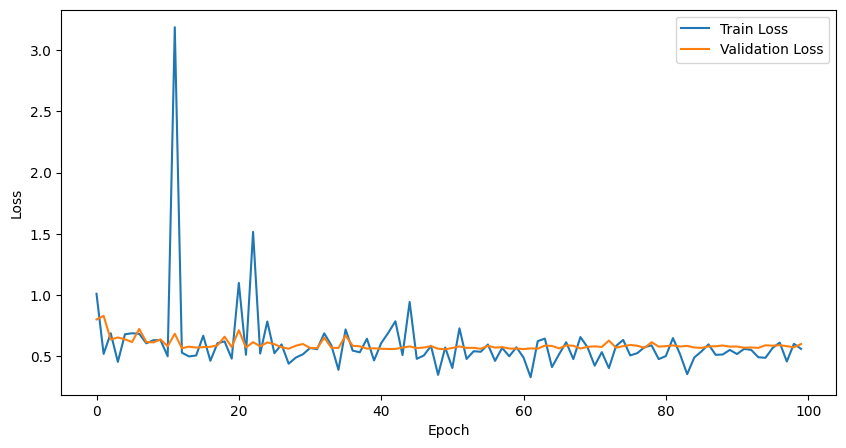

In [ ]:
# Initialize Dataset and DataLoader
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy') 
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

# print(f"training shape: {x_train.shape}, training target shape: {y_train.shape}")
# print(f"first batch of x valdition: {x_val[0]}")
# print(f"first batch of y valdition:{y_val[0]}")

print(x_train.shape, y_train.shape) # Load your precomputed MFCC features and tokenized labels here
train_dataset = SpeechDataset(x_train, y_train)
val_dataset = SpeechDataset(x_val, y_val)


train_dataloader = DataLoader(train_dataset, batch_size=16, collate_fn=collate_fn, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, collate_fn=collate_fn)

device = 'cuda:3'
epoch = 100


def evaluate(model,device, dataloader, ctc_loss):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x_batch, y_batch, input_lengths, target_lengths in dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            x_batch = x_batch.permute(0, 2, 1)  # (N, C, T) -> (N, T, C)

            # Forward pass
            logits = model(x_batch)
            log_probs = F.log_softmax(logits, dim=-1)
            log_probs = log_probs.permute(1, 0, 2)  # (T, N, C) -> (N, T, C)

            # Calculate CTC loss
            loss = ctc_loss(log_probs, y_batch, input_lengths, target_lengths)
            total_loss += loss.item()

    return total_loss / len(dataloader)

def train(model, device, train_dataloader, val_dataloader, optimizer, ctc_loss, num_epochs):
    
    train_losses = []
    val_losses = []
    
    model.to(device)
    #training loop
    for epoch in range(num_epochs):  # Number of epochs        
        model.train()
        for x_batch, y_batch, input_lengths, target_lengths in train_dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            
            # print(x_batch.shape)
            x_batch = x_batch.permute(0, 2, 1)  # (N, C, T) -> (N, T, C)
            # Forward pass
            logits = model(x_batch)  # (N, C, T) -> (T, N, C)
            log_probs = F.log_softmax(logits, dim=-1)
            
            # print(log_probs.shape)
            # print(y_batch.shape)
            log_probs = log_probs.permute(1, 0, 2)  # (T, N, C) -> (N, T, C)
            # Calculate CTC loss
            loss = ctc_loss(log_probs, y_batch, input_lengths, target_lengths)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()     
            optimizer.step()

        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")
        train_losses.append(loss.item())
        #add checkpoint:
        if (epoch + 1) % 5 == 0:
            save_path = f"quartznet_checkpoint_{epoch + 1}.pt"
            torch.save(model.state_dict(), save_path)

        # Evaluate the model
        val_loss = evaluate(model, device, val_dataloader, ctc_loss)
        val_losses.append(val_loss)
        print(f"Validation Loss: {val_loss}")

    

    print("Training complete!")
    save_path = f"quartznet_{num_epochs}_2.pt"
    torch.save(model.state_dict(), save_path)
    return train_losses, val_losses


# Initialize Model, Optimizer, and Loss Function
num_features = x_train[0].shape[0]  # Number of MFCC features per frame
num_classes = 8000  # Vocabulary size (number of unique tokens in y_train)

model = QuartzNet(num_features=num_features, num_classes=num_classes)
# if os.path.exists('quartznet_checkpoint_30.pt'):
#     model.load_state_dict(torch.load('quartznet_checkpoint_10.pt'))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
ctc_loss = nn.CTCLoss(blank=0, reduction='mean', zero_infinity=True)

train_losses, val_losses = train(model, device,train_dataloader, val_dataloader, optimizer, ctc_loss, epoch)
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [3]:
model = QuartzNet(num_features=num_features, num_classes=num_classes)
model.load_state_dict(torch.load('quartznet_100_2.pt'))
input = torch.randn(16,64,2521).permute(0,2,1)
input_names = 'audio'
output_names = 'text'
output = model(input)
torch.onnx.export(model, input, 'quartznet.onnx', input_names=input_names, output_names=output_names)

NameError: name 'QuartzNet' is not defined

In [3]:
import torch
import torch.nn.functional as F
import numpy as np
from typing import List, Dict, Any

class BeamSearchDecoder:
    def __init__(self, tokenizer, beam_width=5, blank_token_id=0):
        """
        Initialize Beam Search Decoder for CTC decoding
        
        Args:
            tokenizer: BPE Tokenizer with decode method
            beam_width: Number of paths to explore simultaneously
            blank_token_id: ID of the blank token in CTC
        """
        self.tokenizer = tokenizer
        self.beam_width = beam_width
        self.blank_token_id = blank_token_id

    def decode(self, log_probs: torch.Tensor) -> str:
        """
        Perform beam search decoding on CTC output
        
        Args:
            log_probs: Log probabilities of shape (time_steps, num_classes)
        
        Returns:
            Decoded text string
        """
        # Convert log probabilities to numpy for easier manipulation
        log_probs = log_probs.cpu().numpy()
        
        # Initialize beam
        beam = [({'sequence': [], 'score': 0.0, 'last_token': None}, )]
        
        # Iterate through time steps
        for t in range(log_probs.shape[0]):
            next_beam = []
            
            for candidate, _ in beam:
                # Current beam state
                sequence = candidate['sequence']
                score = candidate['score']
                last_token = candidate['last_token']
                
                # Top k probabilities for current time step
                top_k_indices = np.argsort(log_probs[t])[::-1][:self.beam_width]
                
                for token_id in top_k_indices:
                    token_log_prob = log_probs[t][token_id]
                    
                    # Handle blank token
                    if token_id == self.blank_token_id:
                        # Blank token doesn't change sequence
                        new_candidate = {
                            'sequence': sequence.copy(),
                            'score': score + token_log_prob,
                            'last_token': None
                        }
                        next_beam.append((new_candidate, ))
                        continue
                    
                    # Extend sequence logic
                    new_sequence = sequence.copy()
                    
                    # Prevent repeated tokens unless they're different
                    if last_token != token_id:
                        new_sequence.append(token_id)
                    
                    new_candidate = {
                        'sequence': new_sequence,
                        'score': score + token_log_prob,
                        'last_token': token_id
                    }
                    next_beam.append((new_candidate, ))
            
            # Prune beam to top k candidates
            next_beam.sort(key=lambda x: x[0]['score'], reverse=True)
            beam = next_beam[:self.beam_width]
        
        # Select best sequence
        best_candidate = max(beam, key=lambda x: x[0]['score'])[0]
        
        # Decode sequence back to text
        decoded_text = self.tokenizer.decode(best_candidate['sequence'])
        
        return decoded_text

def test_speech_recognition_model(
    model: torch.nn.Module, 
    test_dataloader: torch.utils.data.DataLoader, 
    device: str, 
    tokenizer: Any, 
    beam_search_decoder: BeamSearchDecoder
) -> Dict[str, float]:
    """
    Test the speech recognition model
    
    Args:
        model: Trained QuartzNet model
        test_dataloader: DataLoader for test dataset
        device: Device to run inference on
        tokenizer: Tokenizer used for decoding
        beam_search_decoder: Beam search decoder instance
    
    Returns:
        Dictionary of performance metrics
    """
    model.eval()
    model.to(device)
    
    # Metrics to track
    total_samples = 0
    correct_predictions = 0
    total_wer = 0.0  # Word Error Rate
    total_cer = 0.0  # Character Error Rate
    
    with torch.no_grad():
        for x_batch, y_batch, input_lengths, target_lengths in test_dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            
            # Prepare input
            x_batch = x_batch.permute(0, 2, 1)  # (N, C, T) -> (N, T, C)
            
            # Forward pass
            logits = model(x_batch)
            log_probs = F.log_softmax(logits, dim=-1)
            log_probs = log_probs.permute(1, 0, 2)  # (T, N, C)
            
            # Process each sample in batch
            for i in range(x_batch.size(0)):
                # Ground truth
                true_tokens = y_batch[i][:target_lengths[i]].cpu().numpy()
                true_text = tokenizer.decode(true_tokens)
                
                # Prediction using beam search
                sample_log_probs = log_probs[:, i, :]
                pred_text = beam_search_decoder.decode(sample_log_probs)
                
                # Calculate error rates
                wer = word_error_rate(true_text.split(), pred_text.split())
                cer = character_error_rate(true_text, pred_text)
                
                total_wer += wer
                total_cer += cer
                total_samples += 1
                
                # Simple accuracy (might not be the best metric for ASR)
                if pred_text == true_text:
                    correct_predictions += 1
        
        # Compute final metrics
        metrics = {
            'accuracy': correct_predictions / total_samples,
            'word_error_rate': total_wer / total_samples,
            'character_error_rate': total_cer / total_samples
        }
    
    return metrics

def word_error_rate(reference: List[str], hypothesis: List[str]) -> float:
    """
    Compute Word Error Rate using Levenshtein distance
    
    Args:
        reference: List of ground truth words
        hypothesis: List of predicted words
    
    Returns:
        Word Error Rate
    """
    # Levenshtein distance implementation
    d = np.zeros((len(reference) + 1, len(hypothesis) + 1))
    
    for i in range(len(reference) + 1):
        for j in range(len(hypothesis) + 1):
            if i == 0:
                d[i][j] = j
            elif j == 0:
                d[i][j] = i
            elif reference[i-1] == hypothesis[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                substitution = d[i-1][j-1] + 1
                insertion = d[i][j-1] + 1
                deletion = d[i-1][j] + 1
                d[i][j] = min(substitution, insertion, deletion)
    
    return d[len(reference)][len(hypothesis)] / len(reference)

def character_error_rate(reference: str, hypothesis: str) -> float:
    """
    Compute Character Error Rate using Levenshtein distance
    
    Args:
        reference: Ground truth text
        hypothesis: Predicted text
    
    Returns:
        Character Error Rate
    """
    d = np.zeros((len(reference) + 1, len(hypothesis) + 1))
    
    for i in range(len(reference) + 1):
        for j in range(len(hypothesis) + 1):
            if i == 0:
                d[i][j] = j
            elif j == 0:
                d[i][j] = i
            elif reference[i-1] == hypothesis[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                substitution = d[i-1][j-1] + 1
                insertion = d[i][j-1] + 1
                deletion = d[i-1][j] + 1
                d[i][j] = min(substitution, insertion, deletion)
    
    return d[len(reference)][len(hypothesis)] / len(reference)

In [4]:
import jiwer
def test(model, test_loader):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch, input_lengths, target_lengths = next(iter(test_loader))
        x_batch = x_batch.to(device)

        x_batch = x_batch.permute(0, 2, 1)  # (N, C, T) -> (N, T, C)
        output = model(x_batch)
        output = F.log_softmax(output, dim=-1)

        # Use greedy decoding
        decoded_preds = torch.argmax(output, dim=-1)
        print("True:", y_batch[0])
        print("Predicted:", decoded_preds[0])
        # print("WER:", jiwer.wer(y_batch, decoded_preds))

def word_error_rate(preds, targets):
    wer = 0
    for pred, target in zip(preds, targets):
        wer += jiwer.wer(target, pred)
    return wer / len(preds)


In [5]:
#beam search algorithm
import numpy as np
import torch
import torch.nn.functional as F

#parameters
# x_train = np.load('x_train.npy')
num_features = 2521
print (num_features)  # Number of MFCC features per frame
num_classes = 8000  # Vocabulary size (number of unique tokens in y_train)
device = 'cuda:3'

# Load the model and tokenizer
model = QuartzNet(num_features=num_features, num_classes=num_classes)
model.load_state_dict(torch.load("quartznet_100_2.pt"))
model.to(device)

#Load the test dataset:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')
test_dataset = SpeechDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=16, collate_fn=collate_fn)

# Test the model
test(model, test_loader)


2521


/tmp/ipykernel_328469/3155948349.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("quartznet_100_2.pt"))


True: tensor([1582, 3607, 1582, 1987,  135,  805,  124,  509,  135,  184, 1342, 1582,
        1147,  507,  186,  437,  176,  513, 1361,  477,  859,  263,  245, 1026,
         168,  124,  184,  166,  186,  161,  477,  859,  713,  263,  213,  307,
         587,  294,  184,  199,  154, 8001, 8001, 8001, 8001, 8001, 8001, 8001,
        8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001,
        8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001,
        8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001,
        8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001,
        8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001,
        8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001,
        8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001,
        8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001, 8001,
        8001, 8001, 8001, 8001, 80

In [ ]:
# from typing import List, Optional, Tuple
# class ASRConfig:
#     """Configuration for Vietnamese ASR model"""
#     sample_rate: int = 16000
#     n_mels: int = 80
#     n_fft: int = 400
#     hop_length: int = 160
#     win_length: int = 400
#     f_min: float = 0
#     f_max: Optional[float] = 8000
    
#     # Model architecture
#     encoder_dim: int = 144
#     num_encoder_layers: int = 12
#     num_attention_heads: int = 4
#     feed_forward_expansion_factor: int = 4
#     conv_expansion_factor: int = 2
#     input_dropout_p: float = 0.1
#     feed_forward_dropout_p: float = 0.1
#     attention_dropout_p: float = 0.1
#     conv_dropout_p: float = 0.1
#     conv_kernel_size: int = 31
    
#     # Training
#     batch_size: int = 32
#     num_workers: int = 4
#     learning_rate: float = 5e-4
#     weight_decay: float = 1e-6
#     max_epochs: int = 100
    
#     # Vocabulary
#     vocab_size: int = 8000  # Adjust based on your tokenizer


# class PositionalEncoding(nn.Module):
#     """Positional encoding for transformer"""
#     def __init__(self, d_model: int, max_len: int = 5000):
#         super().__init__()
#         pe = torch.zeros(max_len, d_model)
#         position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
#         div_term = torch.exp(torch.arange(0, d_model, 2).float() * 
#                            (-np.log(10000.0) / d_model))
#         pe[:, 0::2] = torch.sin(position * div_term)
#         pe[:, 1::2] = torch.cos(position * div_term)
#         pe = pe.unsqueeze(0)
#         self.register_buffer('pe', pe)

#     def forward(self, x: torch.Tensor) -> torch.Tensor:
#         return x + self.pe[:, :x.size(1)]

# class MultiHeadAttention(nn.Module):
#     """Multi-head attention module"""
#     def __init__(self, config: ASRConfig):
#         super().__init__()
#         self.d_model = config.encoder_dim
#         self.num_heads = config.num_attention_heads
#         self.dropout = nn.Dropout(config.attention_dropout_p)
        
#         self.q_linear = nn.Linear(config.encoder_dim, config.encoder_dim)
#         self.k_linear = nn.Linear(config.encoder_dim, config.encoder_dim)
#         self.v_linear = nn.Linear(config.encoder_dim, config.encoder_dim)
#         self.out = nn.Linear(config.encoder_dim, config.encoder_dim)
        
#     def forward(self, query: torch.Tensor, key: torch.Tensor, 
#                 value: torch.Tensor, mask: Optional[torch.Tensor] = None) -> torch.Tensor:
#         batch_size = query.size(0)
        
#         # Linear projections
#         Q = self.q_linear(query)
#         K = self.k_linear(key)
#         V = self.v_linear(value)
        
#         # Split into heads
#         Q = Q.view(batch_size, -1, self.num_heads, 
#                   self.d_model // self.num_heads).transpose(1, 2)
#         K = K.view(batch_size, -1, self.num_heads, 
#                   self.d_model // self.num_heads).transpose(1, 2)
#         V = V.view(batch_size, -1, self.num_heads, 
#                   self.d_model // self.num_heads).transpose(1, 2)
        
#         # Scaled dot-product attention
#         scores = torch.matmul(Q, K.transpose(-2, -1)) / np.sqrt(self.d_model)
        
#         if mask is not None:
#             scores = scores.masked_fill(mask == 0, -1e9)
        
#         attention = F.softmax(scores, dim=-1)
#         attention = self.dropout(attention)
        
#         # Apply attention to V
#         out = torch.matmul(attention, V)
        
#         # Concatenate heads
#         out = out.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        
#         return self.out(out)

# class ConformerBlock(nn.Module):
#     """Conformer block implementation"""
#     def __init__(self, config: ASRConfig):
#         super().__init__()
#         self.feed_forward_1 = nn.Sequential(
#             nn.Linear(config.encoder_dim, config.encoder_dim * 
#                      config.feed_forward_expansion_factor),
#             nn.ReLU(),
#             nn.Dropout(config.feed_forward_dropout_p),
#             nn.Linear(config.encoder_dim * config.feed_forward_expansion_factor, 
#                      config.encoder_dim)
#         )
        
#         self.mha = MultiHeadAttention(config)
        
#         self.conv_module = nn.Sequential(
#             nn.LayerNorm(config.encoder_dim),
#             nn.Conv1d(config.encoder_dim, config.encoder_dim * 
#                      config.conv_expansion_factor, 1),
#             nn.ReLU(),
#             nn.Conv1d(config.encoder_dim * config.conv_expansion_factor, 
#                      config.encoder_dim, config.conv_kernel_size, 
#                      padding=config.conv_kernel_size // 2, 
#                      groups=config.encoder_dim),
#             nn.BatchNorm1d(config.encoder_dim),
#             nn.ReLU(),
#             nn.Conv1d(config.encoder_dim, config.encoder_dim, 1),
#             nn.Dropout(config.conv_dropout_p)
#         )
        
#         self.feed_forward_2 = nn.Sequential(
#             nn.Linear(config.encoder_dim, config.encoder_dim * 
#                      config.feed_forward_expansion_factor),
#             nn.ReLU(),
#             nn.Dropout(config.feed_forward_dropout_p),
#             nn.Linear(config.encoder_dim * config.feed_forward_expansion_factor, 
#                      config.encoder_dim)
#         )
        
#         self.layer_norm = nn.LayerNorm(config.encoder_dim)
        
#     def forward(self, x: torch.Tensor, mask: Optional[torch.Tensor] = None) -> torch.Tensor:
#         # First Feed Forward
#         ff1 = self.feed_forward_1(x)
#         x = ff1 * 0.5 + x
        
#         # Multi-Head Attention
#         att = self.mha(x, x, x, mask)
#         x = att + x
        
#         # Convolution Module
#         x = x.transpose(1, 2)
#         conv = self.conv_module(x)
#         x = conv + x
#         x = x.transpose(1, 2)
        
#         # Second Feed Forward
#         ff2 = self.feed_forward_2(x)
#         x = ff2 * 0.5 + x
        
#         return self.layer_norm(x)

# class VietnameseASR(nn.Module):
#     """Vietnamese ASR model implementation"""
#     def __init__(self, config: ASRConfig):
#         super().__init__()
#         self.config = config
        
#         # Front-end
#         self.frontend = nn.Sequential(
#             nn.Conv2d(1, config.encoder_dim, 3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(config.encoder_dim, config.encoder_dim, 3, stride=2, padding=1),
#             nn.ReLU()
#         )
        
#         # Positional encoding
#         self.pos_encoding = PositionalEncoding(config.encoder_dim)
        
#         # Conformer blocks
#         self.conformer_blocks = nn.ModuleList([
#             ConformerBlock(config) for _ in range(config.num_encoder_layers)
#         ])
        
#         # Output layer
#         self.output_layer = nn.Linear(config.encoder_dim, config.vocab_size)
        
#     def forward(self, x: torch.Tensor, 
#                 mask: Optional[torch.Tensor] = None) -> torch.Tensor:
#         # Front-end processing
#         x = x.unsqueeze(1)  # Add channel dimension
#         x = self.frontend(x)
#         b, c, t, f = x.size()
#         x = x.transpose(1, 2).contiguous().view(b, t, c * f)
        
#         # Add positional encoding
#         x = self.pos_encoding(x)
        
#         # Conformer blocks
#         for block in self.conformer_blocks:
#             x = block(x, mask)
        
#         # Output layer
#         x = self.output_layer(x)
        
#         return x

In [ ]:
# def train_model(model: nn.Module, train_loader: DataLoader, 
#                 val_loader: DataLoader, config: ASRConfig) -> nn.Module:
#     """Training function"""
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     model = model.to(device)
    
#     optimizer = torch.optim.AdamW(
#         model.parameters(),
#         lr=config.learning_rate,
#         weight_decay=config.weight_decay
#     )
    
#     scheduler = torch.optim.lr_scheduler.OneCycleLR(
#         optimizer,
#         max_lr=config.learning_rate,
#         epochs=config.max_epochs,
#         steps_per_epoch=len(train_loader)
#     )
    
#     criterion = nn.CTCLoss(blank=0, zero_infinity=True)
    
#     for epoch in range(config.max_epochs):
#         model.train()
#         train_loss = 0.0
        
#         for batch_idx, (specs, transcripts) in enumerate(train_loader):
#             specs = specs.to(device)
            
#             optimizer.zero_grad()
            
#             outputs = model(specs)
            
#             # Calculate loss (you'll need to implement proper CTC loss calculation)
#             loss = criterion(outputs, transcripts)
            
#             loss.backward()
#             optimizer.step()
#             scheduler.step()
            
#             train_loss += loss.item()
            
#         # Validation
#         model.eval()
#         val_loss = 0.0
        
#         with torch.no_grad():
#             for specs, transcripts in val_loader:
#                 specs = specs.to(device)
#                 outputs = model(specs)
#                 loss = criterion(outputs, transcripts)
#                 val_loss += loss.item()
        
#         print(f"Epoch {epoch+1}/{config.max_epochs}")
#         print(f"Train Loss: {train_loss/len(train_loader):.4f}")
#         print(f"Val Loss: {val_loss/len(val_loader):.4f}")
    
#     return model

# def quantize_model(model: nn.Module) -> nn.Module:
#     """Quantize model to INT8"""
#     model.qconfig = torch.quantization.get_default_qconfig('fbgemm')
#     torch.quantization.prepare(model, inplace=True)
#     torch.quantization.convert(model, inplace=True)
#     return model

# def export_model(model: nn.Module, path: str):
#     """Export model to ONNX format"""
#     dummy_input = torch.randn(1, 80, 500)  # Example input shape
#     torch.onnx.export(model, dummy_input, path, 
#                      input_names=['input'], 
#                      output_names=['output'],
#                      dynamic_axes={'input': {0: 'batch_size', 2: 'sequence_length'},
#                                  'output': {0: 'batch_size', 1: 'sequence_length'}})

In [ ]:
# def beamSearch(predict, width):
#     # Initialize the beam search
#     beam = [(list(), 1.0)]
    
#     # Step through each prediction
#     for i in range(len(predict)):
#         next_beam = list()
        
#         # Expand each beam
#         for prefix, prob in beam:
#             if len(prefix) > 0:
#                 last = prefix[-1]
#             else:
#                 last = None
            
#             # Add each token to the prefix
#             for j, p in enumerate(predict[i]):
#                 if last == j:
#                     continue
                
#                 # Calculate the new probability
#                 new_prob = prob * p
                
#                 # Add the new prefix to the next beam
#                 next_beam.append((prefix + [j], new_prob))
        
#         # Sort the beam
#         beam = sorted(next_beam, key=lambda x: x[1], reverse=True)
        
#         # Keep only the top `width` prefixes
#         beam = beam[:width]
    
#     return beam

In [ ]:
# x_train = np.load('x_train.npy')
# y_train = np.load('y_train.npy')
# x_val = np.load('x_val.npy')
# y_val = np.load('y_val.npy')


# train_loader = DataLoader(x_train-, batch_size=32, shuffle=True)
# config = ASRConfig()
# model = VietnameseASR(config)

# trained_model = train_model(model, train_loader, val_loader, config)
# quantized_model = quantize_model(trained_model)
# export_model(quantized_model, 'asr_model.onnx')

